In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('freelancer_job_postings.csv')
print(df.head(20))

    projectId                                          job_title  \
0    37426471  development and implementation of a federated ...   
1    37421546                                   Data Entry  -- 2   
2    37400492                                         Data Scrap   
3    37404568                                   Big Data Project   
4    37397423            Virtual Assistant / Research Assistant    
5    37390097                          Build API access to data    
6    37432305           Develop an AI website from the ground up   
7    37383070  Develop a Linux based BT receiving daemon to "...   
8    37375411                                     data analytics   
9    37369494                             GenAI setup in  Azure.   
10   37361837      Collecting Image Dataset for Image Processing   
11   37353422                         Excel budgeting model -- 2   
12   37345161                           i need a power bi expert   
13   37336711  I am looking for a Senior SOC Ana

In [4]:
type(df)
print("jumlah baris dan kolom:", df.shape)
print(df.dtypes)
print(df.info())
df.columns

df.describe()

jumlah baris dan kolom: (9193, 13)
projectId                  int64
job_title                 object
job_description           object
tags                      object
client_state              object
client_country            object
client_average_rating    float64
client_review_count        int64
min_price                float64
max_price                float64
avg_price                float64
currency                  object
rate_type                 object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   projectId              9193 non-null   int64  
 1   job_title              9193 non-null   object 
 2   job_description        9193 non-null   object 
 3   tags                   9193 non-null   object 
 4   client_state           8828 non-null   object 
 5   client_country         9192 non-null   object 

,projectId,client_average_rating,client_review_count,min_price,max_price,avg_price
count,9.193000e+03,9193.000000,9193.000000,9.193000e+03,9.193000e+03,9.193000e+03
mean,3.532858e+07,2.407593,20.823126,2.990256e+03,6.917902e+03,4.954079e+03
std,1.973329e+06,2.472512,87.454084,2.850497e+04,5.348424e+04,4.038176e+04
min,3.108324e+07,0.000000,0.000000,2.000000e+00,3.000000e+00,2.500000e+00
25%,3.356586e+07,0.000000,0.000000,1.000000e+01,3.000000e+01,2.000000e+01
50%,3.632656e+07,0.000000,0.000000,3.000000e+01,2.500000e+02,1.400000e+02
75%,3.702416e+07,5.000000,5.000000,6.000000e+02,1.500000e+03,1.050000e+03
max,3.743938e+07,5.000000,969.000000,1.200000e+06,2.500000e+06,1.750000e+06


In [ ]:
print("Jumlah data kosong:\n", df.isnull().sum())

Jumlah data kosong:
 projectId                0
job_title                0
job_description          0
tags                     0
client_state             0
client_country           0
client_average_rating    0
client_review_count      0
min_price                0
max_price                0
avg_price                0
currency                 0
rate_type                0
avg_price_log            0
review_count_log         0
dtype: int64


In [14]:
df2 = pd.read_csv('freelancer_cleaned_simple.csv')

print("Jumlah data kosong:\n", df2.isnull().sum())

Jumlah data kosong:
 projectId                0
job_title                0
job_description          0
tags                     0
client_state             0
client_country           0
client_average_rating    0
client_review_count      0
min_price                0
max_price                0
avg_price                0
currency                 0
rate_type                0
avg_price_log            0
review_count_log         0
dtype: int64


In [12]:
import pandas as pd

# 1) BACKUP data dulu
df_backup = df.copy()

# 2) CEK JUMLAH DATA KOSONG
print("JUMLAH DATA KOSONG (per kolom):")
print(df.isnull().sum())

# -----------------------------
# 3) ISI DENGAN MODUS (categorical)
# -----------------------------
kolom_modus = [
    'client_state',
    'client_country',
    'currency',
    'rate_type'
]

for kolom in kolom_modus:
    if kolom in df.columns:
        missing = df[kolom].isnull().sum()
        if missing > 0:
            modes = df[kolom].mode()
            if len(modes) > 0:
                moda = modes[0]
                df[kolom] = df[kolom].fillna(moda)
                print(f"Kolom '{kolom}': {missing} NaN diisi dengan modus '{moda}'.")
            else:
                # jika tidak ada modus (mis. semua NaN), isi dengan 'Unknown'
                df[kolom] = df[kolom].fillna('Unknown')
                print(f"Kolom '{kolom}': modus tidak ada, diisi dengan 'Unknown'.")
    else:
        print(f"⚠️ Kolom '{kolom}' tidak ditemukan di DataFrame.")

# CEK hasil sementara untuk kolom_modus yang ada
ada = [c for c in kolom_modus if c in df.columns]
if ada:
    print("\nSisa NaN pada kolom modus setelah imputasi:")
    print(df[ada].isnull().sum())

# -----------------------------
# 4) ISI DENGAN MEAN (numerik)
# -----------------------------
kolom_numerik_mean = [
    'client_average_rating',
    'client_review_count',
    'min_price',
    'max_price',
    'avg_price'
]

for kolom in kolom_numerik_mean:
    if kolom in df.columns:
        # pastikan kolom numeric
        df[kolom] = pd.to_numeric(df[kolom], errors='coerce')
        missing = df[kolom].isnull().sum()
        if missing > 0:
            mean_val = df[kolom].mean()
            # Jika mean adalah NaN (mis. semua kosong), isi 0
            if pd.isna(mean_val):
                mean_val = 0
            df[kolom] = df[kolom].fillna(mean_val)
            print(f"Kolom '{kolom}': {missing} NaN diisi dengan mean = {mean_val:.4f}.")
    else:
        print(f"⚠️ Kolom '{kolom}' tidak ditemukan di DataFrame.")

# CEK hasil untuk kolom numerik
ada_num = [c for c in kolom_numerik_mean if c in df.columns]
if ada_num:
    print("\nSisa NaN pada kolom numerik setelah imputasi:")
    print(df[ada_num].isnull().sum())

# -----------------------------
# 5) ISI DENGAN FILL FORWARD / BACKWARD (ffill, bfill) lalu modus (fallback)
#    Contoh: client_state (berguna kalau nilai berurutan atau grup terkait)
# -----------------------------
kolom_objek = ['client_state']  # bisa ditambah jika ada kolom lain yang cocok

for kolom in kolom_objek:
    if kolom in df.columns:
        missing_before = df[kolom].isnull().sum()
        if missing_before > 0:
            # 1) isi dengan nilai atasnya
            df[kolom] = df[kol].fillna(method='ffill')
            # 2) isi dengan nilai bawahnya
            df[kolom] = df[kol].fillna(method='bfill')
            # 3) jika masih ada NaN, isi dengan modus
            if df[kolom].isnull().sum() > 0:
                modes = df[kolom].mode()
                if len(modes) > 0:
                    df[kolom] = df[kol].fillna(modes[0])
                else:
                    df[kolom] = df[kol].fillna('Unknown')
            missing_after = df[kol].isnull().sum()
            print(f"Kolom '{kolom}': NaN {missing_before} -> {missing_after} setelah ffill/bfill/modus.")
        else:
            print(f"Kolom '{kolom}' tidak punya NaN.")
    else:
        print(f"⚠️ Kolom '{kolom}' tidak ditemukan di DataFrame.")

# -----------------------------
# 6) CEK & HAPUS DUPLIKAT
# -----------------------------
print("\nJUMLAH DUPLIKAT (baris penuh):", df.duplicated().sum())

# Lihat contoh duplikat (tampilkan maksimal 10 baris untuk cek)
dups = df[df.duplicated(keep=False)]
if len(dups) > 0:
    print("Contoh baris duplikat (max 10):")
    display(dups.head(10))
else:
    print("Tidak ditemukan baris duplikat.")

# Hapus duplikat penuh (jika ingin)
df = df.drop_duplicates()
print("Setelah drop_duplicates (penuh), jumlah baris:", len(df))

# Jika ingin hapus duplikat berdasarkan projectId (simpan yang pertama)
if 'projectId' in df.columns:
    dup_by_id = df.duplicated(subset=['projectId']).sum()
    print("Jumlah duplikat berdasarkan projectId:", dup_by_id)
    if dup_by_id > 0:
        df = df.drop_duplicates(subset=['projectId'], keep='first')
        print("Setelah drop_duplicates subset=['projectId'], jumlah baris:", len(df))

# -----------------------------
# 7) CEK KEMBALI & SIMPAN HASIL
# -----------------------------
print("\nJUMLAH DATA KOSONG (setelah semua langkah):")
print(df.isnull().sum())

# Simpan hasil
df.to_csv('freelancer_cleaned_simple.csv', index=False)
print("\nFile disimpan sebagai 'freelancer_cleaned_simple.csv' (backup ada di df_backup).")

JUMLAH DATA KOSONG (per kolom):
projectId                  0
job_title                  0
job_description            0
tags                       0
client_state             365
client_country             1
client_average_rating      0
client_review_count        0
min_price                  0
max_price                  0
avg_price                  0
currency                   0
rate_type                  0
avg_price_log              0
review_count_log           0
dtype: int64
Kolom 'client_state': 365 NaN diisi dengan modus 'Riyadh'.
Kolom 'client_country': 1 NaN diisi dengan modus 'India'.

Sisa NaN pada kolom modus setelah imputasi:
client_state      0
client_country    0
currency          0
rate_type         0
dtype: int64

Sisa NaN pada kolom numerik setelah imputasi:
client_average_rating    0
client_review_count      0
min_price                0
max_price                0
avg_price                0
dtype: int64
Kolom 'client_state' tidak punya NaN.

JUMLAH DUPLIKAT (baris penuh): 

In [ ]:
print("\nJUMLAH DUPLIKAT: ", df.duplicated().sum())
#Lihat baris duplikat
df[df.duplicated()]


JUMLAH DUPLIKAT:  0


,projectId,job_title,job_description,tags,client_state,client_country,client_average_rating,client_review_count,min_price,max_price,avg_price,currency,rate_type


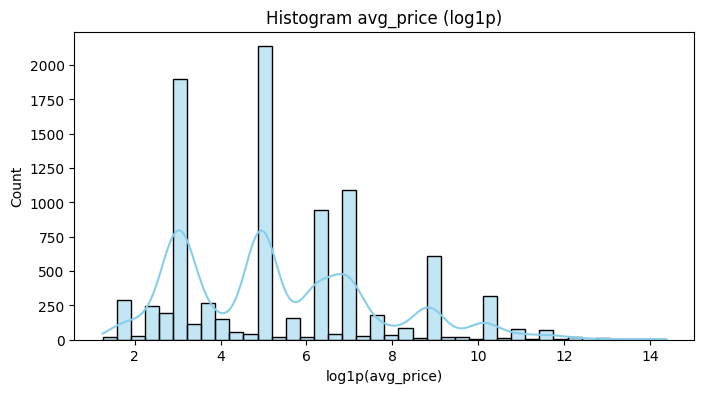

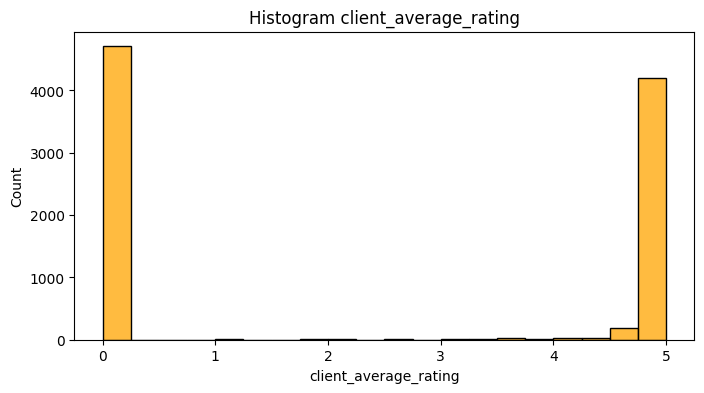

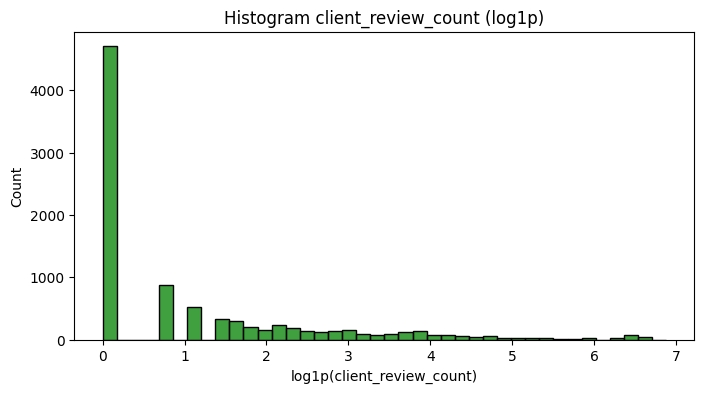

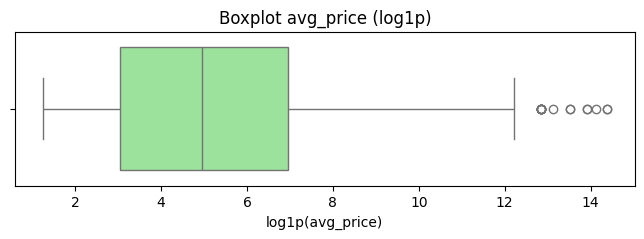

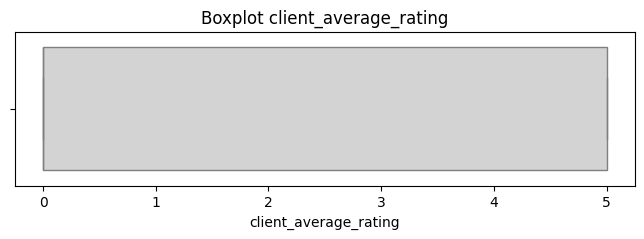

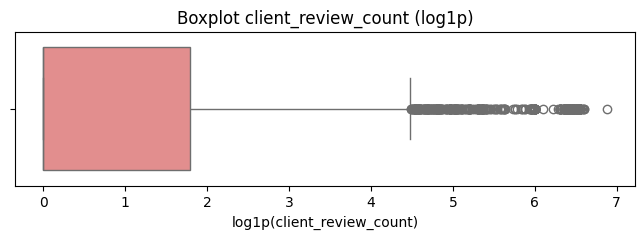

In [8]:
# Simple plots untuk pemula
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pastikan df sudah tersedia
# 1) siapkan kolom yang akan dipakai (isi NaN dengan 0 atau nilai wajar)
df['avg_price'] = df['avg_price'].fillna(0)
df['client_average_rating'] = df['client_average_rating'].fillna(df['client_average_rating'].median())
df['client_review_count'] = df['client_review_count'].fillna(0)

# 2) buat versi log (lebih baik untuk data yang skewed)
df['avg_price_log'] = np.log1p(df['avg_price'])             # log(1 + x)
df['review_count_log'] = np.log1p(df['client_review_count'])

# --- Histogram sederhana ---
plt.figure(figsize=(8,4))
sns.histplot(df['avg_price_log'], bins=40, kde=True, color='skyblue')
plt.title('Histogram avg_price (log1p)')
plt.xlabel('log1p(avg_price)')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['client_average_rating'], bins=20, kde=False, color='orange')
plt.title('Histogram client_average_rating')
plt.xlabel('client_average_rating')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['review_count_log'], bins=40, kde=False, color='green')
plt.title('Histogram client_review_count (log1p)')
plt.xlabel('log1p(client_review_count)')
plt.show()

# --- Boxplot sederhana ---
plt.figure(figsize=(8,2))
sns.boxplot(x=df['avg_price_log'], color='lightgreen')
plt.title('Boxplot avg_price (log1p)')
plt.xlabel('log1p(avg_price)')
plt.show()

plt.figure(figsize=(8,2))
sns.boxplot(x=df['client_average_rating'], color='lightgray')
plt.title('Boxplot client_average_rating')
plt.xlabel('client_average_rating')
plt.show()

plt.figure(figsize=(8,2))
sns.boxplot(x=df['review_count_log'], color='lightcoral')
plt.title('Boxplot client_review_count (log1p)')
plt.xlabel('log1p(client_review_count)')
plt.show()

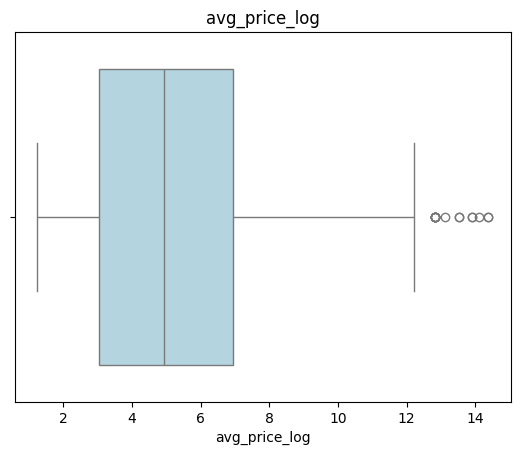

In [11]:
# Boxplot untuk kolom 'Age'
sns.boxplot(x=df['avg_price_log'], color='lightblue')
plt.title('avg_price_log')
plt.show()